### Libraries for Gradient Boosting Tree

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from scipy.stats import *

### Read in the csv file containing the data of interest and show the head

In [77]:
enteroData = pd.read_csv('enteroData.csv')
print(enteroData.shape)
enteroData.head()

(3560, 9)


Sample Date  Enterococci Results  Year Population  Day Before Precipitation  \
0    6/1/2005                  4.0          7939571                       0.0   
1    6/1/2005                  4.0          7939571                       0.0   
2    6/1/2005                  4.0          7939571                       0.0   
3    6/1/2005                  4.0          7939571                       0.0   
4    6/8/2005                  4.0          7939571                       0.0   

   Day of Precipitation  Water Temperature  Sum Precip  Month  Year  
0                   0.0              15.23         0.0      6  2005  
1                   0.0              15.23         0.0      6  2005  
2                   0.0              15.23         0.0      6  2005  
3                   0.0              15.23         0.0      6  2005  
4                   0.0              17.89         0.0      6  2005

### Data Reduction for CSO Rainfall Data

CSOs typically occur when there is rain intensity of 0.1 in/hr, therefore under the assumption that the average storm lasts 30 minutes, 0.05 inches of rainfall during is possibly associated with this intensity and so will be used as the basis for reducing our data:

In [78]:
wetData = enteroData[(enteroData['Day Before Precipitation'] > 0.05) | (enteroData['Day of Precipitation'] > 0.05)]

print(wetData.shape)
wetData.head()

(1408, 9)


Sample Date  Enterococci Results  Year Population  \
54   5/30/2006                  4.0          7904335   
55   5/30/2006                  4.0          7904335   
56   5/30/2006                  4.0          7904335   
69   6/27/2006                  4.0          7904335   
70   6/27/2006                  4.0          7904335   

    Day Before Precipitation  Day of Precipitation  Water Temperature  \
54                      0.20                  0.00              15.92   
55                      0.20                  0.00              15.92   
56                      0.20                  0.00              15.92   
69                      0.06                  0.05              19.44   
70                      0.06                  0.05              19.44   

    Sum Precip  Month  Year  
54        0.20      5  2006  
55        0.20      5  2006  
56        0.20      5  2006  
69        0.11      6  2006  
70        0.11      6  2006

### Looking at average values to see how the correlations differ

In [79]:
enteroAvgData = pd.read_csv('enteroDataAvg.csv')

print(enteroAvgData.shape)
enteroAvgData.head()

(325, 9)


Sample Date  Enterococci Results  Year Population  Day Before Precipitation  \
0    6/1/2005             9.846154          7939571                       0.0   
1    6/8/2005            24.923077          7939571                       0.0   
2   6/14/2005             4.000000          7939571                       0.0   
3   6/20/2005            33.200000          7939571                       0.0   
4    7/5/2005             4.800000          7939571                       0.0   

   Day of Precipitation  Water Temperature  Sum Precip  Month  Year  
0                  0.00              15.23        0.00      6  2005  
1                  0.00              17.89        0.00      6  2005  
2                  0.00              19.17        0.00      6  2005  
3                  0.00              18.56        0.00      6  2005  
4                  0.04              21.23        0.04      7  2005

In [80]:
wetAvgData = enteroAvgData[(enteroAvgData['Day Before Precipitation'] > 0.05) | (enteroAvgData['Day of Precipitation'] > 0.05)]

print(wetAvgData.shape)
wetAvgData.head()

(114, 9)


Sample Date  Enterococci Results  Year Population  \
17   5/30/2006            52.000000          7904335   
20   6/27/2006             8.000000          7904335   
21    7/5/2006            16.615385          7904335   
23   7/18/2006            23.714286          7904335   
39   6/19/2007             6.857143          7908735   

    Day Before Precipitation  Day of Precipitation  Water Temperature  \
17                      0.20                  0.00              15.92   
20                      0.06                  0.05              19.44   
21                      0.00                  1.06              19.92   
23                      0.00                  0.44              22.11   
39                      0.00                  0.06              20.72   

    Sum Precip  Month  Year  
17        0.20      5  2006  
20        0.11      6  2006  
21        1.06      7  2006  
23        0.44      7  2006  
39        0.06      6  2007

Defining Dependent Variable

In [81]:
# The dependent variable, also called the label, is what we are trying to predict
# The labels DataFrame is first initiated like this for the visual representation
enteroLabels = pd.DataFrame({"Enterococci Results": enteroData['Enterococci Results']})
print(enteroLabels.shape)
enteroLabels.head()

(3560, 1)


Enterococci Results
0                  4.0
1                  4.0
2                  4.0
3                  4.0
4                  4.0

In [82]:
wetLabels = pd.DataFrame({"Enterococci Results": wetData['Enterococci Results']})
print(wetLabels.shape)
wetLabels.head()

(1408, 1)


Enterococci Results
54                  4.0
55                  4.0
56                  4.0
69                  4.0
70                  4.0

In [83]:
enteroAvgLabels = pd.DataFrame({"Enterococci Results": enteroAvgData['Enterococci Results']})
print(enteroAvgLabels.shape)
enteroAvgLabels.head()

(325, 1)


Enterococci Results
0             9.846154
1            24.923077
2             4.000000
3            33.200000
4             4.800000

In [84]:
wetAvgLabels = pd.DataFrame({"Enterococci Results": wetAvgData['Enterococci Results']})
print(wetAvgLabels.shape)
wetAvgLabels.head()

(114, 1)


Enterococci Results
17            52.000000
20             8.000000
21            16.615385
23            23.714286
39             6.857143

In [85]:
# This is done to put the dataframe back into the format for the model
labels = enteroData['Enterococci Results']
wetLabels = wetData['Enterococci Results']

avgLabels = enteroAvgData['Enterococci Results']
wetAvgLabels = wetAvgData['Enterococci Results']

Defining Independent Variables/Predictors

In [86]:
# Dropping dependent variable and Date
features = enteroData.drop('Enterococci Results', axis=1)
features = features.drop('Sample Date', axis=1)

print(features.shape)
features.head()

(3560, 7)


Year Population  Day Before Precipitation  Day of Precipitation  \
0          7939571                       0.0                   0.0   
1          7939571                       0.0                   0.0   
2          7939571                       0.0                   0.0   
3          7939571                       0.0                   0.0   
4          7939571                       0.0                   0.0   

   Water Temperature  Sum Precip  Month  Year  
0              15.23         0.0      6  2005  
1              15.23         0.0      6  2005  
2              15.23         0.0      6  2005  
3              15.23         0.0      6  2005  
4              17.89         0.0      6  2005

In [13]:
wetFeatures = wetData.drop('Enterococci Results', axis=1)
wetFeatures = wetFeatures.drop('Sample Date', axis=1)

print(wetFeatures.shape)
wetFeatures.head()

(1408, 7)


Year Population  Day Before Precipitation  Day of Precipitation  \
54          7904335                      0.20                  0.00   
55          7904335                      0.20                  0.00   
56          7904335                      0.20                  0.00   
69          7904335                      0.06                  0.05   
70          7904335                      0.06                  0.05   

    Water Temperature  Sum Precip  Month  Year  
54              15.92        0.20      5  2006  
55              15.92        0.20      5  2006  
56              15.92        0.20      5  2006  
69              19.44        0.11      6  2006  
70              19.44        0.11      6  2006

In [87]:
avgFeatures = enteroAvgData.drop('Enterococci Results', axis=1)
avgFeatures = avgFeatures.drop('Sample Date', axis=1)

print(avgFeatures.shape)
avgFeatures.head()

(325, 7)


Year Population  Day Before Precipitation  Day of Precipitation  \
0          7939571                       0.0                  0.00   
1          7939571                       0.0                  0.00   
2          7939571                       0.0                  0.00   
3          7939571                       0.0                  0.00   
4          7939571                       0.0                  0.04   

   Water Temperature  Sum Precip  Month  Year  
0              15.23        0.00      6  2005  
1              17.89        0.00      6  2005  
2              19.17        0.00      6  2005  
3              18.56        0.00      6  2005  
4              21.23        0.04      7  2005

In [15]:
wetAvgFeatures = wetAvgData.drop('Enterococci Results', axis=1)
wetAvgFeatures = wetAvgFeatures.drop('Sample Date', axis=1)

print(wetAvgFeatures.shape)
wetAvgFeatures.head()

(114, 7)


Year Population  Day Before Precipitation  Day of Precipitation  \
17          7904335                      0.20                  0.00   
20          7904335                      0.06                  0.05   
21          7904335                      0.00                  1.06   
23          7904335                      0.00                  0.44   
39          7908735                      0.00                  0.06   

    Water Temperature  Sum Precip  Month  Year  
17              15.92        0.20      5  2006  
20              19.44        0.11      6  2006  
21              19.92        1.06      7  2006  
23              22.11        0.44      7  2006  
39              20.72        0.06      6  2007

### Making Data into NumPy Arrays

In [88]:
features = np.array(features)
wetFeatures = np.array(wetFeatures)
avgFeatures = np.array(avgFeatures)
wetAvgFeatures = np.array(wetAvgFeatures)

labels = np.array(labels)
wetLabels = np.array(wetLabels)
avgLabels = np.array(avgLabels)
wetAvgFeatures = np.array(wetAvgFeatures)

### We will now split our dataset into training data and testing data

In [89]:
# As mentioned in article, we want our results to be reproducible, so we use a random_state = 21
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size = 0.2, random_state = 21)

print(trainFeatures.shape)
print(testFeatures.shape)
print(trainLabels.shape)
print(testLabels.shape)

(2848, 7)
(712, 7)
(2848,)
(712,)


## Creating the model

### Gradient Boosting Tree

We will first use base parameters to see the performance of the random forest under these conditions

In [110]:
params_gbt = {'loss': 'squared_error',
              'learning_rate': 0.1,
              'n_estimators': 100,
              'min_samples_split': 5,
              'min_samples_leaf': 1,
              'max_depth': 10,
              'max_features': None,
              'ccp_alpha': 0}

gbt = GradientBoostingRegressor(**params_gbt)

gbt.fit(trainFeatures,trainLabels)

GradientBoostingRegressor(ccp_alpha=0, max_depth=10, min_samples_split=5)

Making Predictions

(0.7231561674561421, 6.541483638445576e-47)

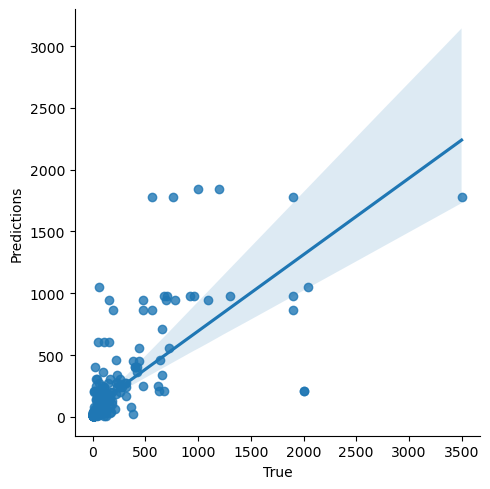

In [111]:
enteroPredictions = gbt.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)
stats.pearsonr(comp['True'], comp['Predictions'])

In [101]:
print('Mean Squared Error:', round(mean_squared_error(testLabels, enteroPredictions), 2), 'cells/100mL.')
print('Mean Absolute Error:', round(mean_absolute_error(testLabels, enteroPredictions), 2), 'cells/100mL.')

Mean Squared Error: 72145.55 cells/100mL.
Mean Absolute Error: 71.4 cells/100mL.


We can then look to find optimal hyperparameters by doing the following:

In [102]:
# Using methods from class
grid = {'loss': ['squared_error'],
        'learning_rate': [0.01, 0.05, 0.1, 0.5],
        'n_estimators': [20,40,80,160], #[int(x) for x in np.linspace(start=500, stop=2000, num=250)],,
        'min_samples_split': [6, 10, 20, 30], #[int(x) for x in np.linspace(start= 2, stop=150, num=32)],
        'min_samples_leaf': [4, 10, 20, 30], #[int(x) for x in np.linspace(start= 1, stop=150, num=32)],
        'max_depth': [4, 8, 16, 32], #[int(x) for x in np.linspace(start= 4, stop=1504, num=100)],
        'max_features': ['auto','sqrt'],
        'ccp_alpha': [0, 0.01, 0.1]}

gbt_grid = GridSearchCV(GradientBoostingRegressor(), param_grid = grid, cv = 3, verbose=3)
gbt_entero = gbt_grid.fit(trainFeatures,trainLabels)
print("The best hyperparameters: \n",gbt_entero.best_params_)

Fitting 3 folds for each of 6144 candidates, totalling 18432 fits
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.148 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.122 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.108 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.235 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.208 total time=  

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.371 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.461 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.392 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.145 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.118 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=s

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.328 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.302 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.274 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.372 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.414 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.244 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.238 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.213 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.275 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.327 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.244 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.236 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.210 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.269 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.321 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.342 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.378 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.342 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.103 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.087 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=s

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.138 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.253 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.252 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.215 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.319 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, los

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.212 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.199 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.282 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.304 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.285 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, l

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.216 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.212 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.171 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.282 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.294 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, lo

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.331 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.246 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.410 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.480 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.382 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squa

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.304 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.232 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.401 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.451 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.353 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.178 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.308 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.362 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.278 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.343 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, los

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.164 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.270 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.315 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.259 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.318 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, los

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.212 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.360 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.414 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.328 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.434 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squ

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.180 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.332 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.374 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.290 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.408 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, los

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.155 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.289 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.319 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.248 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.354 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, los

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.212 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.326 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.393 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.315 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.193 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, lo

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.336 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.249 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.416 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.484 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.385 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.455 total time=   0.3s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.188 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.181 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.135 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.301 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.311 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.365 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.277 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.349 total time=   0.3s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.474 total time=   0.3s
[CV 3/3] END ccp_alpha=0, learning_rate=0.0

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.209 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.164 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.272 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.315 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.258 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01,

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.416 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.492 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.386 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.475 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.589 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.362 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.406 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.304 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.435 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.535 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.0

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.328 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.243 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.363 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.451 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.358 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.284 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.223 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.329 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.401 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.318 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.356 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.262 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.431 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.511 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.393 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.313 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.238 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.409 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.462 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.362 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01,

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.376 total time=   0.3s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.145 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.147 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.105 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.232 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.315 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.258 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.321 total time=   0.3s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.420 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.346 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.431 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.515 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.403 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.476 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.604 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.363 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.412 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.305 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.438 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.541 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.0

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.213 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.157 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.291 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.330 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.254 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01,

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.130 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.257 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.282 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.222 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.332 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.396 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.571 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.483 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.422 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.606 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=sq

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.409 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.461 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.418 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.596 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.349 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.438 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.387 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.372 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.539 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.325 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.430 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.374 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.370 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, lo

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.403 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.393 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.535 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.474 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.415 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.414 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.570 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.473 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.281 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.278 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.387 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.520 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.435 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.233 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.233 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.364 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.495 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.422 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.241 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.231 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.445 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=s

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.596 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.483 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.619 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.524 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.516 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.395 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.414 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.587 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.442 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.368 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.388 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.510 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.417 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.419 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, los

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.605 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.497 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.621 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squa

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.427 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.605 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.496 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, los

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.385 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.420 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.562 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.460 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.434 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, los

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.506 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.419 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.418 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.580 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.479 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.463 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.523 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.538 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.434 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.511 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.400 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.460 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05,

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.431 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.599 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.455 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.448 total time=   0.4s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.618 total time=   0.4s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, lo

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.459 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.372 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.401 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.532 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.436 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.502 total time=   0.3s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.456 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.558 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.443 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.470 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=s

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.400 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.460 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.460 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.617 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.507 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.452 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.0

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.362 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.493 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.388 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.434 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.588 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05,

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.594 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.496 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.275 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.315 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.241 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.0

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.541 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.443 total time=   0.4s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.614 total time=   0.4s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, lo

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.603 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.480 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.455 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.627 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.522 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05,

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.503 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.327 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.405 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.311 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.385 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.400 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.439 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.430 total time=   0.3s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.588 total time=   0.3s
[CV 3/3] END ccp_alpha=0, learning_rate=0.0

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.450 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.541 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.462 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.519 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.452 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.618 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.0

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.583 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.468 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.454 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.617 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.519 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.440 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.339 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.389 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.536 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.440 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05,

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.418 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.608 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.513 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.438 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.423 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.596 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.496 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.435 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.374 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.449 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.407 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.601 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.378 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.404 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.573 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.423 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.602 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.493 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.431 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.426 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.610 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.516 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.342 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.402 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=sq

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.395 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.589 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.493 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.281 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.333 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=sq

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.404 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.563 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.472 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.278 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.307 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=sq

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.445 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.614 total time=   0.3s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.619 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.523 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.537 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.585 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.451 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.435 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.494 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.422 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.420 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.570 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.479 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.442 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squa

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.618 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.537 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_er

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.501 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.441 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.535 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squa

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.453 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.437 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.607 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squa

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.585 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.488 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.519 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=sq

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.444 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.542 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.463 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.605 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.489 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.456 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.506 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.448 total time=   0.4s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.537 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.382 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=s

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.531 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.439 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.430 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.586 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.505 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.452 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.619 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.451 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.453 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squ

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.593 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.499 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.455 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=sq

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.444 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_er

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.456 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.627 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.527 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.452 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.618 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.542 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.383 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.522 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.406 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.430 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squ

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.505 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.449 total time=   0.4s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.538 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.333 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, los

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.530 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.438 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.435 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.586 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.504 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.612 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.453 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.619 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.538 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.448 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, los

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.453 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.522 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.452 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, los

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.533 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.436 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.598 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.495 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.431 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.612 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.443 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.433 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.617 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.390 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.588 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.520 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.438 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.539 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squa

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.443 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.354 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.490 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squa

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.439 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.538 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.446 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.615 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=square

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.445 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.3s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squar

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squar

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.536 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.543 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_e

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.542 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squa

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=sq

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.449 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.617 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.541 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squa

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.444 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.445 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.614 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.541 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.447 total time=   0.4s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.3s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.457 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.3s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.3s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, los

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, los

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.612 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, los

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.444 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.543 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.614 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.541 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.446 total time=   0.4s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.542 total time=   0.4s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.456 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.446 total time=   0.3s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.3s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, los

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, los

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, los

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, los

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.330 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.311 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.287 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.369 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.464 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.328 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.301 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.274 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.373 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.420 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.244 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.238 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.213 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.275 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.327 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.244 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.236 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.210 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.269 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.321 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.175 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.297 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.296 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.267 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.368 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.244 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.227 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.326 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.347 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.313 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, lea

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.284 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.302 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.279 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.087 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.080 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.112 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.211 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.215 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.177 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.287 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.360 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.270 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.417 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.514 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.404 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_ra

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.457 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.185 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.185 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.137 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.299 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learni

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.362 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.278 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.343 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.470 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.374 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.164 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.270 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.315 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.259 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.318 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.471 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.373 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.455 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.587 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.478 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.378 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.297 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.424 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.515 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.406 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.314 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.250 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.359 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.440 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.352 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.282 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.209 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.325 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.391 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.310 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.162 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.313 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.365 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.275 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.427 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_ra

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.464 total time=   0.3s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.598 total time=   0.3s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.492 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.187 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.185 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lea

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.305 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.234 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.405 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.452 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.355 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, l

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.376 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.145 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.147 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.105 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.232 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, 

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.315 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.258 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.321 total time=   0.3s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.420 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.346 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.415 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.490 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.384 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.472 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.592 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.361 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.407 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.308 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.441 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.537 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01,

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.206 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.153 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.292 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.326 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.255 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, l

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.180 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.125 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.251 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.283 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.218 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, l

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.504 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.198 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.215 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.153 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.319 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.409 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.462 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.362 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.455 total time=   0.3s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.579 total time=   0.3s
[CV 3/3] END ccp_alpha=0.01,

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.246 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.179 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.311 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.365 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.277 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, l

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.346 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.120 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.122 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.091 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.188 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, l

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.433 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.516 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.404 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.476 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.604 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.365 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.404 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.311 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.437 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.539 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.327 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.252 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.360 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.459 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.358 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, lea

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.180 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.137 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.257 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.281 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.219 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learni

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.371 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.487 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.438 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.396 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.571 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.349 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.343 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.310 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.381 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.406 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.538 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.454 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.420 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.595 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.349 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.438 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.387 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.372 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.539 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.325 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.430 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.374 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.370 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.502 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.402 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.600 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.497 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.276 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.301 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.348 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.384 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.475 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.418 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.412 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.414 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.385 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.384 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.521 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, lea

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.367 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.486 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.422 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.442 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.556 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learnin

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.605 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.507 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.443 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.617 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.534 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_ra

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.537 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.424 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.498 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.392 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.587 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.442 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.437 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.613 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.490 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.368 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.388 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.510 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.417 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.419 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.529 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.541 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.610 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.508 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.443 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.620 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, lea

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.563 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.461 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.438 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.605 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.505 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.420 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.420 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.578 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.481 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.270 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, lea

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.519 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.541 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.538 total time=   0.4s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.434 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.511 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.400 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.460 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, 

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.432 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.597 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.455 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.450 total time=   0.4s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.619 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01,

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.459 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.372 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.401 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.532 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.437 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, l

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.455 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.559 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.444 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.472 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learni

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.461 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.620 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.516 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.455 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.618 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.437 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.586 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.471 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.454 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.534 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.429 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.436 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.592 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.497 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, lea

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.523 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.541 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_ra

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.4s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.434 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.510 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.400 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.460 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.451 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.626 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.522 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.454 total time=   0.4s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.618 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01,

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.520 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.403 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.433 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.598 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.456 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, l

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.293 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.352 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.291 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.332 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, 

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.453 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.610 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.613 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.462 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.617 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.514 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.453 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.619 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01,

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.430 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.586 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.465 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.456 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01,

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.441 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.349 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.388 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.534 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.441 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, l

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.375 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.516 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.423 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.400 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.423 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.596 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.496 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.435 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.374 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.449 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.407 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.601 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.378 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.404 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.573 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.469 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.421 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.601 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.509 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.432 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.564 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.472 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.427 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.515 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.410 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.588 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.494 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.291 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.330 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.356 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.363 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.492 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.415 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.390 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.538 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.541 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.458 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.599 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.489 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.494 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.443 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.614 total time=   0.3s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.515 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.422 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.420 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.570 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.479 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.528 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.450 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.602 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.495 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.446 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1,

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.426 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.556 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.499 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.441 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.457 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.443 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.607 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.504 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.441 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.428 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.421 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.587 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.487 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.438 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.611 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.443 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.613 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.614 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.542 total time=   0.4s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.456 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.600 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.487 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.449 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.618 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.507 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.448 total time=   0.4s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.531 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.439 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.430 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.589 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.505 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.473 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.602 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.517 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.452 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.455 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.448 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.453 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.515 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.453 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.377 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.527 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.443 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.431 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.593 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.614 total time=   0.5s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.543 total time=   0.5s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.463 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.616 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.524 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_ra

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.453 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.618 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.539 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.448 total time=   0.5s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.432 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.597 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.458 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.450 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.618 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.538 total time=   0.4s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.333 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.459 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.374 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learnin

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.430 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.587 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.502 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.448 total time=   0.3s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.613 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.453 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.455 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.519 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.454 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.404 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.537 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.437 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.433 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.596 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=20;, score=0.432 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=20;, score=0.608 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=20;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.438 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.617 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.433 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.612 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.442 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.433 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.536 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.412 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.560 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.506 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.433 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.609 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.525 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.439 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.537 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.446 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.616 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.543 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.536 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_ra

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.542 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.543 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.539 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.612 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.541 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.444 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.543 total time=   0.3s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.614 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.541 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learni

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.447 total time=   0.3s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.610 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.3s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.542 total time=   0.4s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.446 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.614 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.543 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_r

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.610 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.444 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.5s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.541 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.4s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.449 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.612 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.448 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.446 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.614 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.542 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.446 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.330 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.311 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.287 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.369 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.464 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.328 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.301 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.274 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.373 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.420 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.244 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.238 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.213 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.275 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.327 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.244 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.236 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.210 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.269 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.321 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.171 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.299 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.292 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.268 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.358 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.246 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.217 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.332 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.345 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.322 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.277 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.304 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.280 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.084 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.073 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.101 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.209 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.209 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.170 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.280 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.360 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.270 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.417 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.514 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.404 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.456 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.185 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.185 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.137 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.299 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rat

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.362 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.278 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.343 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.470 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.374 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.164 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.270 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.315 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.259 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.318 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.471 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.371 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.457 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.586 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.471 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01,

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.380 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.295 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.419 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.515 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.404 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.317 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.249 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.354 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.436 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.356 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.219 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.331 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.392 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.313 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.104 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.313 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.365 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.275 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.426 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.519 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.0

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.598 total time=   0.3s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.494 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.187 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.185 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.139 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.405 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.451 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.355 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.451 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.567 total time=   0.3s
[CV 3/3] END ccp_alpha=0.1, learn

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.246 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.179 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.311 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.365 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.277 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.348 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.120 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.122 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.091 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.188 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learni

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.418 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.490 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.380 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.475 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.590 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.361 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.407 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.303 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.441 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.537 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learn

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.206 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.156 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.292 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.328 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.250 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.181 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.133 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.253 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.284 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.215 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.504 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.198 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.215 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.153 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.319 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.409 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.462 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.362 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.455 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.579 total time=   0.3s
[CV 3/3] END ccp_alpha=0.1, learn

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.246 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.179 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.311 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.365 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.277 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.348 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.120 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.122 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.091 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.188 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learnin

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.433 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.517 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.404 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.476 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.604 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.357 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.410 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.307 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.438 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.542 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.327 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.254 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.360 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.456 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.359 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.180 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.130 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.249 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.284 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.218 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.371 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.487 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.438 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.396 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.573 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, lo

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.349 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.343 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.310 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.381 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.406 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.538 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.454 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.420 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.595 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.349 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.438 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.387 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.374 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.539 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.325 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.430 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.374 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.370 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.502 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.404 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.597 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.500 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.279 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.279 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.336 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.378 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.482 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.421 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.422 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.408 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.381 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.383 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.517 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.451 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.364 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.487 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.419 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.442 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.557 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.605 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=40;, score=0.507 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.442 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.535 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.537 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.424 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.498 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.392 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.586 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.441 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.435 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.489 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.368 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.388 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.508 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.415 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.419 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.527 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.541 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.607 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.504 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.534 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.566 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.459 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.437 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.605 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.505 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.427 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.416 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.582 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.480 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.275 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.619 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.520 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.541 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.538 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.434 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.509 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.400 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.460 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learni

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.431 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.597 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.455 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.450 total time=   0.4s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.618 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, learn

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.457 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.373 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.390 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.529 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.439 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.460 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.559 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.446 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.471 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rat

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.461 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.516 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.453 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.430 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.582 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.476 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.454 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.619 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.534 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.436 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.432 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.596 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.498 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.522 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.445 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.434 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.509 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.400 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.460 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.451 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.624 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.523 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.454 total time=   0.4s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.617 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, learn

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.519 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.403 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.431 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.598 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.455 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.293 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.351 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.291 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.331 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learni

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.454 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.611 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.613 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.461 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.514 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.451 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.618 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learn

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.432 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.582 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.477 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.453 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.618 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learn

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.440 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.351 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.388 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.534 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.431 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.541 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.375 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.516 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.423 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.400 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, lo

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.435 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.612 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.383 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.457 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.374 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.441 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.407 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.601 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.378 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.404 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.572 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.445 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.410 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.598 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.509 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.432 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, lo

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.570 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.470 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.427 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.406 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.586 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.491 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.299 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.339 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.358 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.350 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.490 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.422 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.404 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.537 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, los

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.619 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.617 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.374 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.517 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.402 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.414 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.571 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.480 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.442 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.611 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.528 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, 

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.619 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, 

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.611 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.511 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.443 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.534 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, 

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.584 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.480 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.610 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.524 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, 

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.524 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.541 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.445 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, los

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.445 total time=   0.4s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.463 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.604 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.622 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.453 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.616 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.539 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.537 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.383 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.525 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.404 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.428 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.429 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.586 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.504 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.448 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.613 total time=   0.3s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.453 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.448 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.456 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.513 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.451 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.397 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.533 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.440 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.437 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.596 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.614 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.543 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.465 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.619 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.520 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.453 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.617 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.540 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.448 total time=   0.5s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.5s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.599 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.457 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.450 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.618 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.505 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.537 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.333 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.464 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.374 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.398 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rat

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, l

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.450 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.617 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.448 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.457 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.520 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.451 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.592 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.496 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.451 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.442 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.616 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.543 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squ

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.424 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.620 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.523 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.437 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, lo

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.433 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.443 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.433 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.595 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, 

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.522 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.441 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.614 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.538 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.613 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.527 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.443 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.541 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.442 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.539 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.445 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.615 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5,

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.445 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, 

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.616 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.449 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.615 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.523 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.448 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.612 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.542 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, 

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.542 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.527 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.448 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.540 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.445 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.614 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.542 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.449 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.614 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.541 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.447 total time=   0.4s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.614 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.613 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.447 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.614 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.543 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.447 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.445 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.445 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, los

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.614 total time=   0.5s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.543 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.540 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.445 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.615 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.542 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.445 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.448 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.614 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.614 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.542 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.439 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.601 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.543 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.447 total time=   0.2s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.613 total time=   0.2s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.615 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.543 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.446 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.450 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.617 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.536 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.451 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.448 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.614 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.447 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.615 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

(0.6341327194279737, 2.343928789729822e-81)

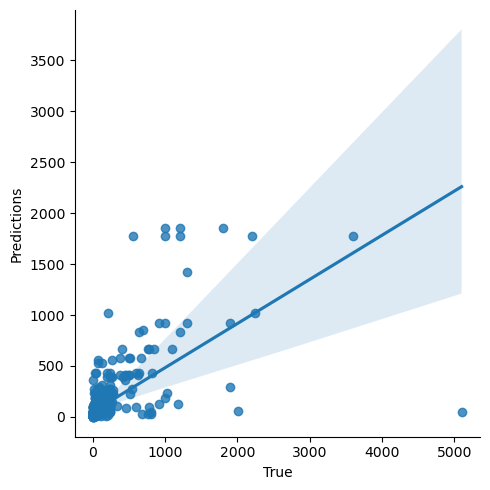

In [103]:
enteroPredictions = gbt_entero.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)

stats.pearsonr(comp['True'], comp['Predictions'])

In [105]:
print('Mean Squared Error:', round(mean_squared_error(testLabels, enteroPredictions), 2), 'cells/100mL.')
print('Mean Absolute Error:', round(mean_absolute_error(testLabels, enteroPredictions), 2), 'cells/100mL.')

Mean Squared Error: 72986.29 cells/100mL.
Mean Absolute Error: 71.71 cells/100mL.


### Further Updating Hyperparameters

In [90]:
params_gbtUp = {'loss': 'squared_error',
                'learning_rate': 0.05,
                'n_estimators': 2000,
                'min_samples_split': 20,
                'min_samples_leaf': 8,
                'max_depth': 8,
                'max_features': 'sqrt',
                'ccp_alpha': 0}

gbtUp = GradientBoostingRegressor(**params_gbtUp)

gbtUp.fit(trainFeatures,trainLabels)

GradientBoostingRegressor(ccp_alpha=0, learning_rate=0.05, max_depth=8,
                          max_features='sqrt', min_samples_leaf=8,
                          min_samples_split=20, n_estimators=2000)

(0.6407468984963339, 1.4981386898487604e-83)

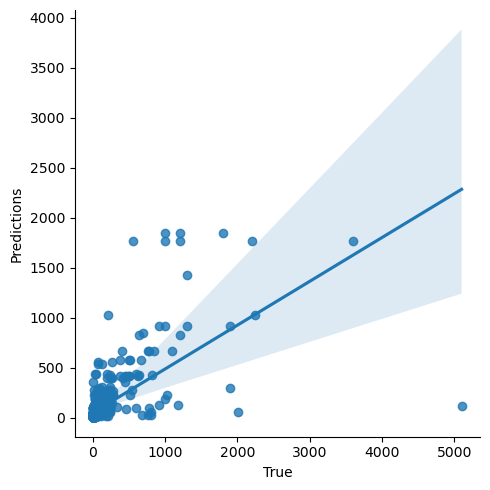

In [91]:
enteroPredictions = gbtUp.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)

stats.pearsonr(comp['True'], comp['Predictions'])

In [92]:
print('Mean Squared Error:', round(mean_squared_error(testLabels, enteroPredictions), 2), 'cells/100mL.')
print('Mean Absolute Error:', round(mean_absolute_error(testLabels, enteroPredictions), 2), 'cells/100mL.')

Mean Squared Error: 71909.46 cells/100mL.
Mean Absolute Error: 70.89 cells/100mL.


### Now an analysis will be done on whether or not the model can improve at higher values, if values below the CSO threshold are omitted

In [94]:
# As mentioned in article, we want our results to be reproducible, so we use a random_state = 21
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(wetFeatures, wetLabels, test_size = 0.2, random_state = 21)

In [113]:
wetGbt = GradientBoostingRegressor(**params_gbt)

wetGbt.fit(trainFeatures,trainLabels)

GradientBoostingRegressor(ccp_alpha=0, max_depth=10, min_samples_split=5)

(0.7231561674561421, 6.541483638445576e-47)

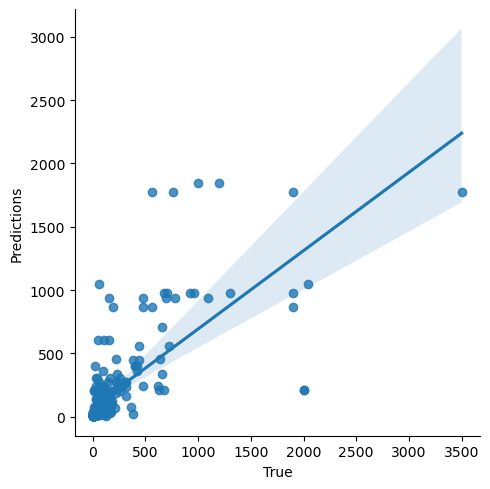

In [114]:
enteroPredictions = wetGbt.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)
stats.pearsonr(comp['True'], comp['Predictions'])

In [115]:
print('Mean Squared Error:', round(mean_squared_error(testLabels, enteroPredictions), 2), 'cells/100mL.')
print('Mean Absolute Error:', round(mean_absolute_error(testLabels, enteroPredictions), 2), 'cells/100mL.')

Mean Squared Error: 77154.3 cells/100mL.
Mean Absolute Error: 108.62 cells/100mL.


In [117]:
# Using methods from class

wetGbt_grid = GridSearchCV(GradientBoostingRegressor(), param_grid = grid, cv = 3, verbose=3)
wetGbt_entero = wetGbt_grid.fit(trainFeatures,trainLabels)
print("The best hyperparameters: \n",gbt_entero.best_params_)

Fitting 3 folds for each of 6144 candidates, totalling 18432 fits
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.206 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.227 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.124 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.334 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.377 total time=  

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.458 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.191 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.226 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.124 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.309 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squ

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.445 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.160 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.169 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.091 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.262 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=sq

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.329 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.160 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.152 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.090 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.263 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=sq

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.324 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.177 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.186 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.117 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.283 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=square

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.490 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.555 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.417 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.148 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.157 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=s

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.318 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.217 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.436 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.466 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.313 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=s

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.124 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.311 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.307 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.213 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.424 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squ

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.395 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.555 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.674 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.493 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.234 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.367 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.518 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.674 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.461 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.215 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.274 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.517 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.570 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.346 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.516 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.337 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.164 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.675 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.486 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.223 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.249 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.150 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squa

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.400 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.180 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.205 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.111 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.312 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.248 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.150 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.395 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.390 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.248 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.329 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.129 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.101 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.068 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.215 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, los

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.555 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.674 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.490 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.234 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.262 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, l

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.583 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.366 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.518 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.674 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.462 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.274 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.569 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.346 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.514 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.337 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.164 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.512 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.598 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.392 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.556 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.676 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.312 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.365 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.191 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.461 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01,

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.386 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.401 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.249 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.490 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.541 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.0

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.318 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.109 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.103 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.066 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.218 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.555 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.674 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.491 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.234 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.262 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, l

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.583 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.366 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.518 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.674 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.462 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.274 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.569 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.346 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.

[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.514 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.337 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.164 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.512 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.598 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.392 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.556 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.676 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.321 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.362 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.194 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.459 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.538 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01,

[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.385 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.394 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.246 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.497 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.537 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.0

[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.468 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.319 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.123 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.114 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.075 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.0

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.514 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.653 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.529 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.489 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.572 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=s

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.515 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.660 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.528 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.452 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.571 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.518 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.654 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.520 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.398 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.461 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.526 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.625 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.488 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.398 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.414 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.511 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.525 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.439 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.516 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=s

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.494 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.519 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.655 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.510 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.355 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.520 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.598 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.446 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.528 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, los

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.298 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.248 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.461 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.459 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.340 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.639 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.539 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.648 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.433 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=sq

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.505 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.623 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.465 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.653 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.449 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.449 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.542 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.655 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.490 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.528 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.623 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=s

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.523 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.594 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.336 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, lo

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.505 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.414 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.419 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.273 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.522 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, los

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.481 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.367 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.366 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.498 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, los

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.639 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.543 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.673 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.477 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.510 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.512 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05,

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.385 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.545 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.651 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.464 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.448 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.543 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.494 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.509 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, lo

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.652 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.591 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.350 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.0

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.662 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.508 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.434 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.434 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.286 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.0

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.370 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.365 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.240 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.489 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.522 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05,

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.639 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.543 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, l

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.673 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.477 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.509 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.658 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.512 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05,

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.385 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.545 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.651 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.464 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.448 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.543 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.494 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.510 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.652 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, lo

[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.651 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.514 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.509 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.581 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.347 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.0

[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.523 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.664 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.505 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.431 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.431 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.

[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.488 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.354 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.374 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.258 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.495 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.05

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.521 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.492 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.522 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_e

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.529 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.495 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.639 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.470 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.520 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squa

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.528 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.491 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.581 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.376 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.513 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squa

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.441 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.518 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.355 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.513 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squa

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.504 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.649 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.475 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.513 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.654 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.513 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.417 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.538 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.615 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.475 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.528 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_e

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.637 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.636 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_erro

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.522 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=square

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.655 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.521 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.499 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.647 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.541 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.657 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.495 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.519 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.653 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.547 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_err

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.507 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.654 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.519 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.497 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.504 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.650 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.524 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.507 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=square

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.519 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.660 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.508 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.484 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.515 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.636 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_e

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=sq

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.649 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.469 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.656 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.518 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.488 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.520 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.652 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.514 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.463 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=s

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.563 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.672 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.661 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.498 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.503 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.522 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=sq

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.654 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.476 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.523 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.656 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.514 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=sq

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_e

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.510 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.657 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.518 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.650 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.469 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.500 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.656 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.519 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.448 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.540 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.659 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.488 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.520 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squa

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared

[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.529 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.546 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.660 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=

[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.664 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.504 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.504 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.521 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=sq

[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.480 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.521 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.655 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.512 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.510 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.1, loss=s

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.506 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_er

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.642 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.506 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.640 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squar

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.515 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squar

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.531 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=square

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.504 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.657 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.514 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_er

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.642 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.527 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.498 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.642 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.500 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.521 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.620 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squar

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.523 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.524 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=sq

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.534 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.637 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.534 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_e

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=sq

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.522 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.532 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.640 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.495 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.660 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=sq

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.527 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.528 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=sq

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.634 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.500 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.636 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.2s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=sq

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.642 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, los

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=sq

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.527 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.527 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.652 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squ

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, los

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.534 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.500 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.519 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=sq

[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.527 total time=   0.1s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.525 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.500 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss

[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.537 total time=   0.0s
[CV 2/3] END ccp_alpha=0, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.642 total time=   0.0s
[CV 3/3] END ccp_alpha=0, learning_rate=0.5, lo

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.524 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.621 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.461 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.203 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.226 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.218 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.424 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.530 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.341 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.485 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.460 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.329 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.160 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.169 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lea

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.422 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.478 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.324 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.160 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.152 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lea

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.489 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.578 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.447 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.172 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.184 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.165 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.377 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.438 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.267 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.478 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.465 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.320 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.120 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.127 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.077 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.312 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.296 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.203 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.430 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.434 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.262 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.513 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.606 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.393 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.553 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.215 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.255 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.143 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.350 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.420 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.274 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.570 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.346 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.516 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.337 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.164 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, lea

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.557 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.678 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.486 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.220 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.242 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.547 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.656 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.404 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.185 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.215 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lea

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.490 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.529 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.344 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.150 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.151 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.316 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.132 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.122 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.070 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.232 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.555 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.674 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.490 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.234 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.262 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.245 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.477 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.583 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.366 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.519 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, 

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.274 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.569 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.346 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.514 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.337 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.164 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.512 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.597 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.391 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.555 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.676 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.112 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.324 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.365 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.197 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.461 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, l

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.347 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.157 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.151 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.084 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.254 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, l

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.344 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.337 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.225 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.464 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.478 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.601 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.394 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.555 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.675 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.490 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.583 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.366 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.519 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.674 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.462 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.274 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.517 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.569 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.346 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, le

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.514 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.337 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.164 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, le

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.556 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.677 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.489 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.230 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.256 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.653 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.405 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.183 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.213 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.110 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, l

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.493 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.537 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.350 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.149 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.144 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, l

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.472 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.324 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.127 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.131 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.070 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, l

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.491 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.518 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.523 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.514 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.658 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.511 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.515 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.660 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.528 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.518 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.654 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.520 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.398 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.461 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.526 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.625 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.488 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.398 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.414 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.383 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.498 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.586 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.482 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.518 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_ra

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.493 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.521 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.662 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.516 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.402 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, lea

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.460 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.518 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.350 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.520 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.608 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.613 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.476 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.345 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.337 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.252 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, lear

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.478 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.509 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.657 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.516 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.503 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.465 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.654 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.449 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.449 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.542 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.655 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.490 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, lea

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.659 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.525 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.502 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.504 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.655 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.525 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.475 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, lea

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.526 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.657 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.509 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.444 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.431 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.480 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.379 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.360 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.265 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.483 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.529 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=30, n_estimators=20;, score=0.521 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, lea

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.512 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.523 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.385 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.545 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.649 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.464 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, 

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.448 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.494 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=20;, score=0.503 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=20;, score=0.581 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, lea

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.675 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.498 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.653 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.518 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.578 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.374 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.561 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.657 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, l

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.488 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.514 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.351 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.543 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.623 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, l

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.639 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.543 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.650 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.429 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, lear

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.512 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.523 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.649 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.464 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.658 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.448 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.543 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.494 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.509 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, lear

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.652 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.523 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.500 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.584 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.661 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.466 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.525 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.663 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.507 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.427 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.543 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.656 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.482 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.386 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.523 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.512 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.503 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.656 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.504 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.529 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.508 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.653 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.528 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.491 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.581 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.520 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.647 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.441 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.518 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.503 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.527 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.507 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.609 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.493 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.513 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.661 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.517 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.510 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.654 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.515 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.450 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.480 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.349 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.530 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.626 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.464 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.532 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.654 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.515 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.503 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.543 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.618 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.390 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.542 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.648 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.653 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.462 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.556 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.367 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.504 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.654 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.520 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.521 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.658 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.498 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.506 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.652 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.522 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.655 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.503 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.481 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.511 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.637 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.635 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.658 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.518 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learni

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.649 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.469 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.656 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.518 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.514 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.463 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.556 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.368 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.520 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learni

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.529 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.504 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.650 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.531 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.567 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.488 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.516 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.658 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.512 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.479 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learnin

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.635 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.637 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.658 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.518 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.527 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.650 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.469 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.656 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.518 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.634 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.448 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.540 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.659 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.488 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.652 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.523 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.503 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.652 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.517 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.565 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.485 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.519 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.656 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.512 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.494 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learnin

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.506 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.642 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.506 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.640 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_ra

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.649 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.522 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.523 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.508 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.514 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_ra

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.642 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.519 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.655 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.509 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.647 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.519 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.503 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.640 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.534 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.640 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_ra

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.500 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.529 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.522 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.503 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.649 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.515 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.635 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.506 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.507 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_r

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.500 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.532 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.500 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.650 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.500 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learni

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.536 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.658 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.507 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.521 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.642 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.511 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learnin

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.538 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.497 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=40;, score=0.532 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.635 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.500 total time=   0.2s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.532 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_ra

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.640 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.494 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.648 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.527 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learnin

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, lea

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20;, score=0.500 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=160;, score=0.524 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.520 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.500 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learni

[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.647 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learni

[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.517 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.659 total time=   0.0s
[CV 3/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.510 total time=   0.0s
[CV 1/3] END ccp_alpha=0.01, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.509 total time=   0.0s
[CV 2/3] END ccp_alpha=0.01, learn

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.531 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.346 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.523 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.623 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.461 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.485 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.623 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.445 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.191 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.226 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.368 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.418 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.246 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.460 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.533 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.369 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.376 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.244 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.422 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.478 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.575 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.436 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=20;, score=0.150 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=20;, score=0.160 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=30, n_estimators=20;, score=0.103 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.171 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.381 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.449 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.267 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.473 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.473 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.318 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.120 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.116 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.074 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.319 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.311 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.203 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.430 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.420 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.262 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.513 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.607 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.393 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.553 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.215 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.255 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.143 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.350 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.420 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.273 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.570 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.346 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.516 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.338 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.164 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.558 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.675 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.486 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.214 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.242 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.549 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.655 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.403 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.185 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.217 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.495 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.538 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.347 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.154 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.145 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.317 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.128 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.115 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.073 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.220 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.555 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.673 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.490 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.234 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.262 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.245 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.477 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.583 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.366 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.519 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learni

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.274 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.569 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.346 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, lear

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.515 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.337 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.164 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, lear

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.513 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.596 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.392 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.556 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.676 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.114 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.318 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.360 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.196 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.465 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learnin

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.352 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.154 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.149 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.087 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.254 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learnin

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.336 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.343 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.209 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.466 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.471 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.601 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.394 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.555 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.675 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.490 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.245 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.477 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.583 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.366 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.519 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.274 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.517 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.569 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.346 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.175 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.444 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.515 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.337 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.164 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.556 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.676 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.489 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.232 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.256 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.540 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.304 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.544 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.658 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.409 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.257 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.252 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.155 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.386 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.400 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.337 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.328 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.217 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.463 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.01, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.475 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.513 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.652 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.528 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.492 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.571 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.470 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.517 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.658 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.511 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.515 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.618 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.482 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.518 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.654 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.520 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.514 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.573 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.447 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.526 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.625 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.518 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.513 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.652 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.436 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.581 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.434 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.524 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.523 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.500 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.370 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.368 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.515 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.565 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.418 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.543 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.617 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.509 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.510 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.505 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.622 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.408 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.520 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.674 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.465 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.656 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.449 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.449 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.542 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.655 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.490 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.647 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.532 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.630 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.506 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.652 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.494 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.581 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.664 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.504 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.424 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.459 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.480 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.369 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.384 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.257 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.488 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.639 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.543 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.672 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.479 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.509 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.515 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.518 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.449 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.492 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.304 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.544 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learnin

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.542 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.658 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.494 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.444 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learnin

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.542 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.653 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.525 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.493 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.571 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.347 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.527 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.665 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.508 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.419 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.420 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learnin

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.544 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.654 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.484 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.403 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.385 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learnin

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.647 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.515 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.651 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.464 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.656 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.518 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.448 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.542 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.658 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.494 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.407 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.542 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.640 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.652 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.525 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.583 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.360 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learnin

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.464 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.523 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.665 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.511 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.431 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.546 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.652 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.480 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.05, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.392 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.522 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.504 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.647 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.529 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.495 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.639 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.476 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.521 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.521 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.508 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, lo

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.520 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.647 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.517 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.441 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.518 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.484 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.525 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.648 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.512 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.513 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, los

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.510 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.503 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.649 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.482 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.530 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.594 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.429 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.518 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.634 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.650 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.503 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.462 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.503 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.327 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, 

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.526 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.468 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.499 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.658 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.521 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.500 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.495 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.519 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.653 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.516 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.462 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.647 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, 

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.525 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.647 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.570 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.503 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.650 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.524 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.510 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.563 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.512 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.503 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.525 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.371 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.526 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.534 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.658 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.518 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.527 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.469 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.658 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.519 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.448 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.535 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.660 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.492 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.523 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.543 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.548 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.656 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.454 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.523 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.665 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.546 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.625 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.439 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.549 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.656 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.2s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.545 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.684 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.510 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=40;, score=0.509 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.527 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.524 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.469 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.657 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.520 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.463 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.556 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.368 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.525 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.634 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.532 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, 

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.651 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.505 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.649 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.522 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.523 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.588 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.488 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.520 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.514 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.1, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.482 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=80;, score=0.531 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.504 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.642 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.506 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.640 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.532 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.515 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.653 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.646 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.531 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.534 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, los

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.524 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.506 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.642 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.515 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.649 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.527 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.526 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.528 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.631 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.484 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=4, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.522 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.640 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.534 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, 

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.639 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.500 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.532 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.500 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, l

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.521 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.504 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.650 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.514 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.503 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.523 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.527 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.649 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.494 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.509 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.636 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.634 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.642 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.641 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.530 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.534 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.527 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.525 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rat

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.641 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.645 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.522 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.662 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=16, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.477 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_r

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.638 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80;, score=0.531 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.636 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.532 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.643 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.530 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.500 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.643 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rat

[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.522 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.529 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.502 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_ra

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.645 total time=   0.1s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160;, score=0.528 total time=   0.1s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=20;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.532 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.1s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_

[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.502 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.525 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.501 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_r

[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.646 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.528 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.532 total time=   0.0s
[CV 2/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.632 total time=   0.0s
[CV 3/3] END ccp_alpha=0.1, learning_rate=0.5, loss=squared_error, max_depth=32, max_features=sqrt, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.504 total time=   0.0s
[CV 1/3] END ccp_alpha=0.1, learning_r

(0.7206494319692583, 1.89107550506086e-46)

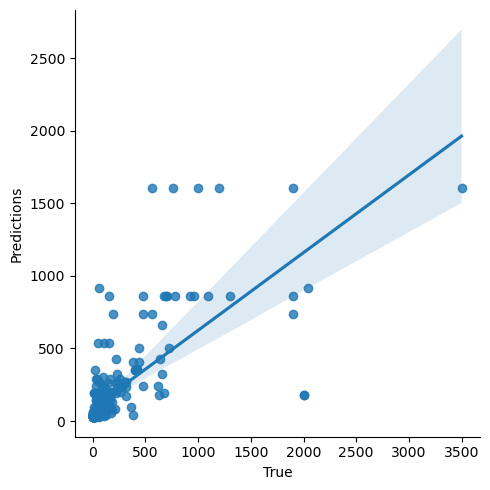

In [118]:
enteroPredictions = wetGbt_entero.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)
stats.pearsonr(comp['True'], comp['Predictions'])

In [119]:
print('Mean Squared Error:', round(mean_squared_error(testLabels, enteroPredictions), 2), 'cells/100mL.')
print('Mean Absolute Error:', round(mean_absolute_error(testLabels, enteroPredictions), 2), 'cells/100mL.')

Mean Squared Error: 75086.97 cells/100mL.
Mean Absolute Error: 112.54 cells/100mL.


### Further Updating Hyperparameters

In [70]:
params_gbtUp = {'loss': 'squared_error',
              'learning_rate': 0.05,
              'n_estimators': 2000,
              'min_samples_split': 16,
              'min_samples_leaf': 10,
              'max_depth': 32,
              'max_features': 'sqrt',
              'ccp_alpha': 0}

wetGbtUp = GradientBoostingRegressor(**params_gbtUp)

wetGbtUp.fit(trainFeatures,trainLabels)

GradientBoostingRegressor(ccp_alpha=0, learning_rate=0.05, max_depth=32,
                          max_features='sqrt', min_samples_leaf=10,
                          min_samples_split=16, n_estimators=2000)

(0.723156633031208, 6.540186913807691e-47)

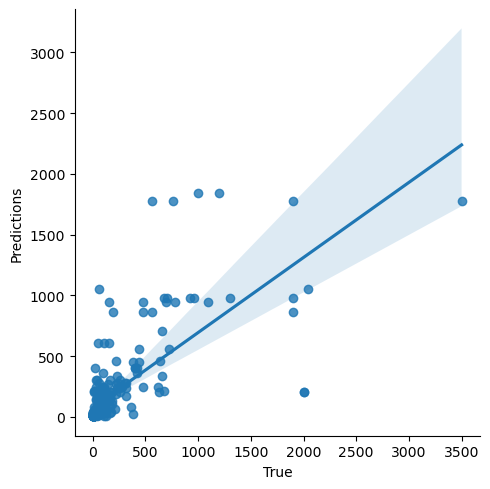

In [71]:
enteroPredictions = wetGbtUp.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)
stats.pearsonr(comp['True'], comp['Predictions'])

In [72]:
print('Mean Squared Error:', round(mean_squared_error(testLabels, enteroPredictions), 2), 'cells/100mL.')
print('Mean Absolute Error:', round(mean_absolute_error(testLabels, enteroPredictions), 2), 'cells/100mL.')

Mean Squared Error: 77155.11 cells/100mL.
Mean Absolute Error: 108.62 cells/100mL.


### Applying Original GBT to the wet data

(0.7894732789353975, 2.6561466317864695e-61)

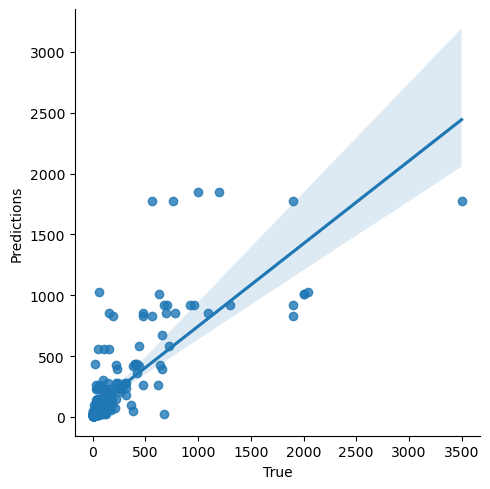

In [95]:
enteroPredictions = gbtUp.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)
stats.pearsonr(comp['True'], comp['Predictions'])

In [96]:
print('Mean Squared Error:', round(mean_squared_error(testLabels, enteroPredictions), 2), 'cells/100mL.')
print('Mean Absolute Error:', round(mean_absolute_error(testLabels, enteroPredictions), 2), 'cells/100mL.')

Mean Squared Error: 59609.62 cells/100mL.
Mean Absolute Error: 97.09 cells/100mL.
